D:\python\Environment\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 0.8442874692874693
Test accuracy: 0.8341777982496545
              precision    recall  f1-score   support

           0       0.87      0.93      0.89      4954
           1       0.70      0.54      0.61      1559

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.83      0.83      0.83      6513



<AxesSubplot: >

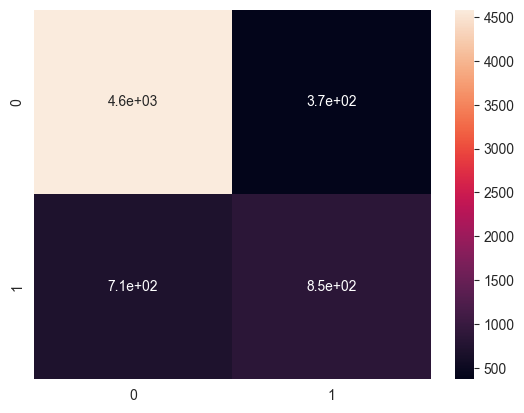

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 读取数据
data = pd.read_csv('DecisionTree.csv')

# 分割特征和标签
feature_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']

X = data[feature_columns]
y = data[label_column]

# 对分类特征进行One-Hot编码
X = pd.get_dummies(X)

# 对标签进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

# XGBoost模型
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 在训练集上测试效果
print("Train accuracy:", accuracy_score(y_train, model.predict(X_train)))

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 模型评估
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)